<a href="https://colab.research.google.com/github/pattanps/ppm2-ML-AI-course/blob/main/ppm2ml_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervisor Learning
## 1. Import data [นำข้อมูลเข้า]
## 2. Preprocessing data, data wrangling [จัดการสิ่งรบกวน].
## 3. Choose a mathematical model [Classification: Random forest]
## 4. Train, Learning [ร่ำเรียน, ฝึกฝน]
## 5. Evaluation [วิเคราะห์]
## 6. Decision [ตัดสินใจ]


In [2]:
#install important libraries

# Pandas
# yfinance
! pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 741 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf
ethusd = yf.Ticker("ETH-USD")
fdata = ethusd.history(period="max")

fdata.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0,0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0,0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0,0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0,0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0,0


In [4]:
# เพิ่มแถวข้อมูล
# 1. moving average period 20
# 2. moving average period 100
# 3. Standard variation

# 1. moving average period 20
fdata["MovingAverage 20"]= fdata['Close'].rolling(20).mean()
fdata["MovingAverage 100"]= fdata['Close'].rolling(100).mean()
# เพิ่ม moving average 200 
# หาขนาด ความผันผวน Volatility 

In [14]:
fdata[100:120]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MovingAverage 20,MovingAverage 100
Date,,,,,,,,,
2018-02-17 00:00:00+00:00,944.747986,976.594971,940.754028,974.114990,2525720064,0,0,912.039548,769.617271
2018-02-18 00:00:00+00:00,973.348999,982.932983,915.445007,923.921021,2567290112,0,0,899.117599,775.863951
2018-02-19 00:00:00+00:00,921.668030,957.776978,921.554016,943.864990,2169019904,0,0,892.754349,782.155791
2018-02-20 00:00:00+00:00,943.567017,965.265015,892.953979,895.370972,2545260032,0,0,881.607394,788.030421
2018-02-21 00:00:00+00:00,894.135010,912.375000,830.562988,849.971008,2531729920,0,0,872.266443,793.362971
2018-02-22 00:00:00+00:00,849.262024,875.926025,802.668030,812.844971,2150370048,0,0,867.119443,798.115110
2018-02-23 00:00:00+00:00,811.585022,886.317993,794.791016,864.189026,2334820096,0,0,862.127945,803.423431
2018-02-24 00:00:00+00:00,861.593018,879.531006,818.549988,840.515015,1926579968,0,0,862.419595,808.519341
2018-02-25 00:00:00+00:00,839.458984,853.145996,822.380981,844.809998,1646960000,0,0,869.762546,813.643501


In [16]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 6.8 MB/s 


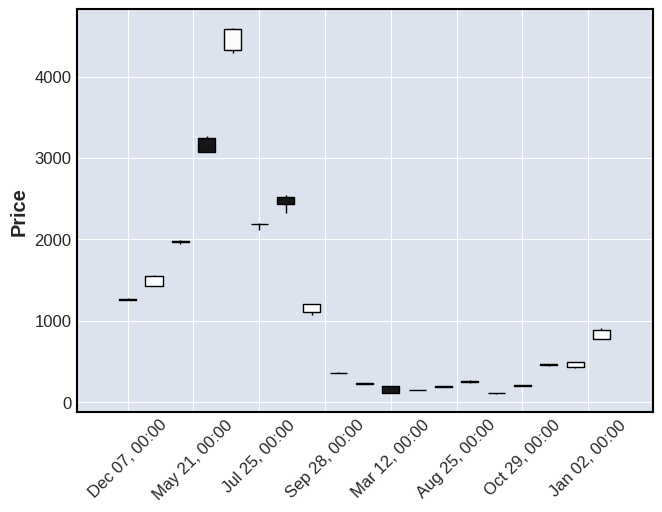

In [24]:
import mplfinance as mpf
fdata.index.name = 'Date'

mpf.plot(fdata[::-100],type='candle')

In [25]:
type(fdata)

pandas.core.frame.DataFrame

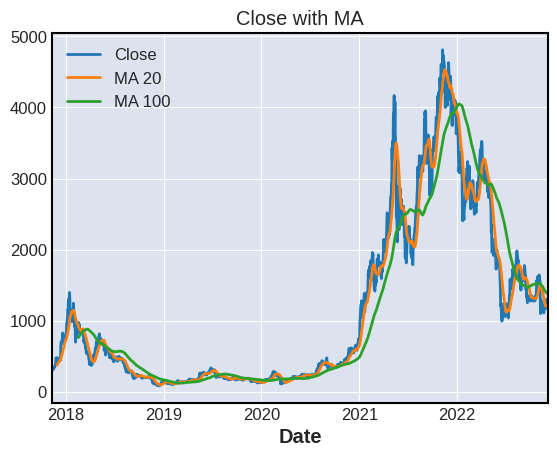

In [39]:
chart = fdata['Close'].plot(title="Close with MA", label = "Close")
fdata['MovingAverage 20'].plot(fig=chart, label = "MA 20")
fdata['MovingAverage 100'].plot(fig=chart, label = "MA 100")
chart.legend()

In [40]:
# Install technical indicator for python

In [42]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_ta-0.3.14b0-py3-none-any.whl


In [57]:
import pandas_ta as ta

tafdata = fdata.ta

# create RSI data from fdata
rsi = tafdata.rsi()

rsi

Date
2017-11-09 00:00:00+00:00          NaN
2017-11-10 00:00:00+00:00          NaN
2017-11-11 00:00:00+00:00          NaN
2017-11-12 00:00:00+00:00          NaN
2017-11-13 00:00:00+00:00          NaN
                               ...    
2022-12-03 00:00:00+00:00    48.242340
2022-12-04 00:00:00+00:00    51.818349
2022-12-05 00:00:00+00:00    49.754853
2022-12-06 00:00:00+00:00    50.978344
2022-12-07 00:00:00+00:00    48.982265
Name: RSI_14, Length: 1855, dtype: float64

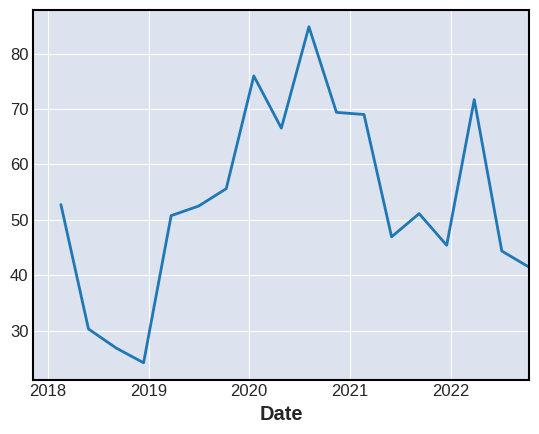

In [60]:
rsi[::100].plot()